In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm, ttest_ind
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [4]:
df["height"] = df["height"].str.strip("meters").astype(float)

(1.0, 4.0)

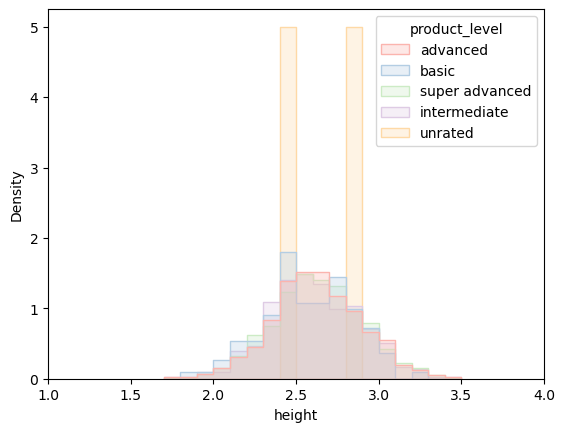

In [5]:
sns.histplot(data=df, x="height", hue="product_level", binwidth=0.1, stat="density", common_norm=False, alpha=0.3, element="step", palette="Pastel1")
plt.xlim(1,4)

In [6]:
def two_sample_t_test(sample1, sample2, x_name, sample_title, sample1_name, sample2_name):
    sample1 = sample1[~np.isnan(sample1)]
    sample2 = sample2[~np.isnan(sample2)]
    cmap = plt.colormaps.get_cmap('tab10').colors
    sample = np.concatenate((sample1, sample2),axis=0)
    #Sturge's Rule
    unique_num = len(np.unique(sample))
    bin_num = round(1+3.322*np.log(unique_num))
    plt.hist(sample1, bins=bin_num, density=True, alpha=0.3, color=cmap[0], label=sample1_name)
    plt.hist(sample2, bins=bin_num, density=True, alpha=0.3, color=cmap[1], label=sample2_name)
    mu1, std1 = norm.fit(sample1)
    mu2, std2 = norm.fit(sample2)
    x1 = np.linspace(min(sample1), max(sample1), 100)
    p1 = norm.pdf(x1, mu1, std1)
    x2 = np.linspace(min(sample2), max(sample2), 100)
    p2 = norm.pdf(x2, mu2, std2)
    plt.plot(x1, p1, linewidth=2, color=cmap[0])
    plt.plot(x2, p2, linewidth=2, color=cmap[1])
    statistic, pvalue =ttest_ind(sample1, sample2)
    plt.text((mu1+mu2)/2, max(max(p1),max(p2))*1.1, "t-statistic = "+str(round(statistic,3))+", p-value = "+str(round(pvalue,3)), ha='center')
    plt.legend(title=sample_title)
    plt.xlabel(x_name)
    plt.ylabel("Density")

In [7]:
sample1, sample2 = df[df["product_level"]=='basic']["height"], df[df["product_level"]=='advanced']["height"]

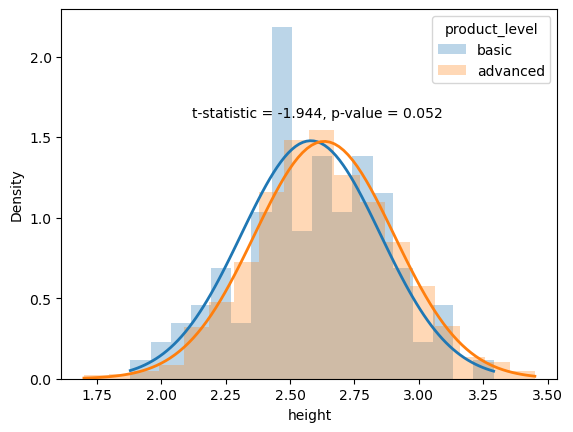

In [8]:
two_sample_t_test(sample1, sample2, "height", "product_level", "basic", "advanced")